<a href="https://colab.research.google.com/github/lucasarneiro5/Data-Science/blob/main/Airbnb_Data_Chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *CHICAGO*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade DE Chicago, e ver quais insights podem ser extraídos a partir de dados brutos.**

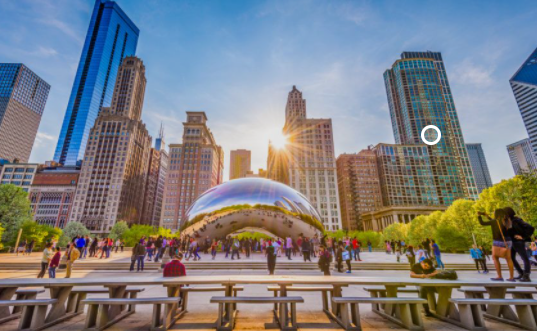

Às margens do imenso Lago Michigan, a cidade de Chicago já presenciou a guerra dos criminosos de Al Capone e dos jovens de Eliot Ness. É o tipo de destino que vai te deixar admirado com tantas surpresas.

Em cada esquina, você encontra pontos turísticos famosos, restaurantes com pratos de dar água na boca e muita badalação, com casas noturnas e bares sempre lotados de gente bonita em busca de diversão e novas amizades.

A cidade é muito é muita agitada e vibrante à noite, mas se o tipo de turismo em Chicago que você quer segue o estilo cultural, também não faltarão opções. 

Isso porque o destino é um verdadeiro centro de belos espetáculos, galerias com obras de arte incríveis e teatros com programação todos os dias da semana, além de muita música. [O que fazer em Chicago](https://www.segurospromo.com.br/blog/o-que-fazer-em-chicago/)

## Obtenção dos Dados


In [56]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [57]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/il/chicago/2021-10-18/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* id = Numero de identificação de reserva;
* name = Nome da reserva disponivel; 
* host_id = ID do host (dono da reserva);
* host_name = Nome do dono da reserva;
* neighbourhood_group = Grupo da vizinhaça;
* neighbourhood = Bairro da reserva;
* latitude = Latitude de localizaçao da reserva;
* longitude = Longitude de localizaçao da reserva;
* room_type = Tipo de casa/apa/quarto que está sendo alugado; 
* price = Preço da diaria;
* minimum_nights = Minimo de noites que tem de ser alugada;
* number_of_reviews = Numero de feedbacks da locação;
* last_review = Ultima data que foi feita revisada;
* reviews_per_month = Numero de reviews/mês;
* calculated_host_listings_count = Quantidade de imoveis do mesmo anfitriao;
* availability_365 = Disponiblidade de dias por ano;
* number_of_reviews_ltm	= Numero de reviews por ltm?
* license = Numero da licensa.

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [58]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2384,Hyde Park - Walk to University of Chicago,2613,Rebecca,NaN,Hyde Park,41.78790,-87.58780,Private room,81,3,190,2021-09-24,2.41,1,329,10,R17000015609
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.90166,-87.68021,Entire home/apt,65,2,414,2021-10-06,3.34,1,230,29,R18000034991
2,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.91196,-87.63981,Entire home/apt,125,4,36,2021-10-04,0.40,7,144,16,2120297
3,12068,Chicago GOLD COAST 1 Bedroom Condo,40731,Dominic,NaN,Near North Side,41.90491,-87.63213,Entire home/apt,99,7,13,2021-10-16,0.16,1,0,4,City registration pending
4,12140,Lincoln Park Guest House,46734,Sharon And Robert,NaN,Lincoln Park,41.92357,-87.64947,Private room,329,2,7,2021-07-06,0.09,1,167,3,R20000055258


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

O dataset apresenta 18 variáveis de entrada (features) e 6528 entradas de dados. 

Os tipos de variaveis descito na célula [8].

In [59]:
# identificar o volume de dados do DataFrame
df.shape

(6528, 18)

In [60]:
# Tipos de variaveis
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

1. De acordo com a logica abaixo, vemos a variavel *neighbourhood_group* com 100% de dados faltantes e entre 6% a 15% entre outras features. 

2. Podemos fazer os questionamentos como:


*   A coluna *neighbourhood_group* é importante para utilizar na análise?
*   As colunas *reviews_per_month*, *last_review*                                 , *license* e *host_name* já são importantes para a situação apresentada, por isso devem ser tratadas.



In [61]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100

neighbourhood_group               100.000000
reviews_per_month                  15.594363
last_review                        15.594363
license                             6.770833
host_name                           0.045956
longitude                           0.000000
name                                0.000000
host_id                             0.000000
neighbourhood                       0.000000
latitude                            0.000000
room_type                           0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

**Alguns pontos são importantes de ressaltar**:

- O preço está na faixa de até 500,00, mas pela escala, poderemos ver valores de até 5000,00 (o que podem ser outliers);

- Assim como preço, o número minimo de noites apresenta valores discrepantes para o negócio, na faixa de 200 a 500 noites;

- O número de locações/hosts listados apresenta, aparentemente um valor de outlier, 300. É possivel alguem ter 300 casas/ap para locação em uma unica cidade?

- Podemos plotar bloxplots para confirmar essas teorias.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48c58b2450>,
      dtype=object)

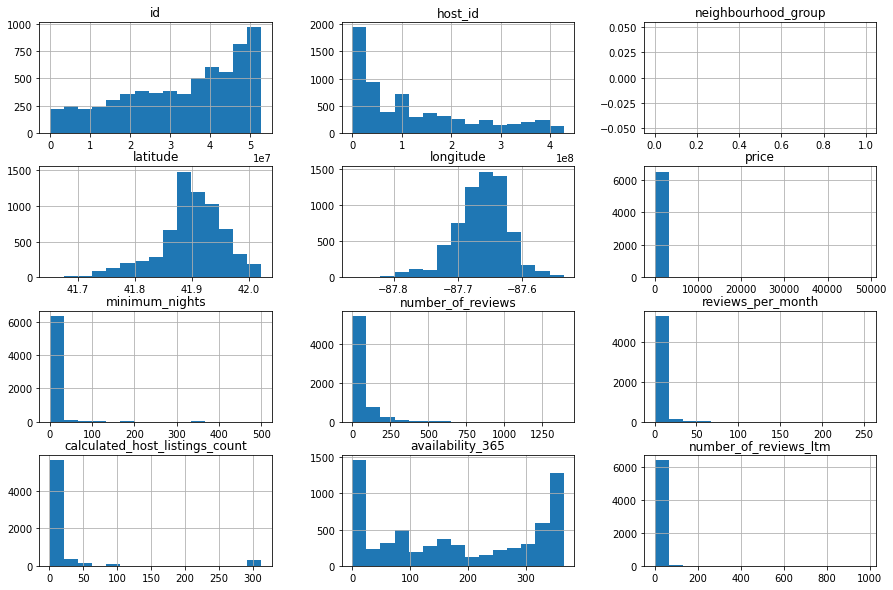

In [62]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10))

In [63]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,6.528000e+03,6.528000e+03,0.0,6528.000000,6528.000000,6528.000000,6528.000000,6528.000000,5510.000000,6528.000000,6528.000000,6528.000000
mean,3.305271e+07,1.217399e+08,NaN,41.898251,-87.663115,299.258425,9.211397,46.377145,3.521632,22.345895,178.385110,11.925858
std,1.494224e+07,1.200565e+08,NaN,0.058499,0.042220,2319.930240,22.728897,75.133071,7.855918,66.699864,137.490354,22.877154
min,2.384000e+03,2.153000e+03,NaN,41.650640,-87.864150,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.140874e+07,2.191582e+07,NaN,41.872585,-87.686815,75.000000,1.000000,2.000000,0.530000,1.000000,44.000000,0.000000
50%,3.652392e+07,8.490272e+07,NaN,41.899715,-87.659450,119.000000,2.000000,16.000000,1.720000,2.000000,166.000000,4.000000
75%,4.641521e+07,1.915230e+08,NaN,41.938783,-87.632417,190.000000,4.000000,57.000000,3.760000,9.000000,327.000000,18.000000
max,5.282783e+07,4.273566e+08,NaN,42.022200,-87.535880,48864.000000,500.000000,1390.000000,252.000000,313.000000,365.000000,982.000000


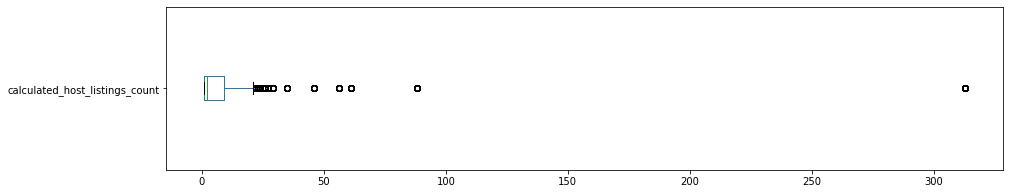

In [64]:
# calculated_host_listings_count
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

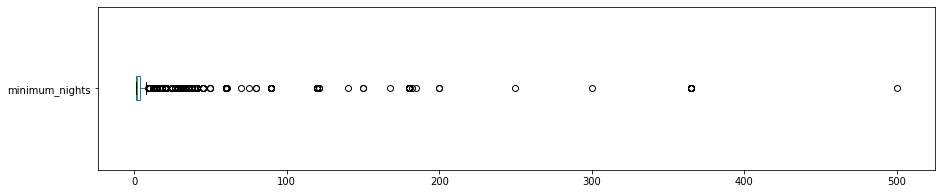

Numero minimo de noites com valores acima de 30: 632 entradas
Pocentagem de valores acima de 30 noites: 9.6814%


In [65]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("Numero minimo de noites com valores acima de 30: {} entradas".format(len(df[df.minimum_nights > 30])))
print("Pocentagem de valores acima de 30 noites: {:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

- O preço minimo é de 0.00 dolares (o que não faz sentido dentro do contexto) e o valor máximo de 48.864K dolares, seriam outliers? Para o valor de 0 doláres, sim, mas para o valor alto, talvez não, dependendo da hospedagem (vulgo Copacabana Palace), mas o valor iria influencia na criação de um modelo;

- Ao número maximo de noites é de 500. Faria mais sentido, pensando uma locação de 1 ano e meio (aluguel em contrato);

- O número de locações/hosts listados apresenta, aparentemente um valor de outlier, 300. É possivel alguem ter 313 casas/ap para locação em uma unica cidade? Provavelmente não...podemos considerar um Outlier.



---


**Tratamento dos Dados**

In [66]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  115.0
Limite superior de price:  362.5
Limite inferior de price:  -97.5


In [67]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  3.0
Limite superior de minimum_nights:  8.5
Limite inferior de minimum_nights:  -3.5


In [68]:
# identificando os outliers para a variável minimum_nights
q1_calculated_host_listings_count = df.calculated_host_listings_count.quantile(.25)
q3_calculated_host_listings_count = df.calculated_host_listings_count.quantile(.75)
IQR_calculated_host_listings_count = q3_calculated_host_listings_count - q1_calculated_host_listings_count
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_calculated_host_listings_count = q3_calculated_host_listings_count + 1.5 * IQR_calculated_host_listings_count
inf_calculated_host_listings_count = q1_calculated_host_listings_count - 1.5 * IQR_calculated_host_listings_count

print('Limite superior de mcalculated_host_listings_count: ', sup_calculated_host_listings_count)
print('Limite inferior de calculated_host_listings_count: ', inf_calculated_host_listings_count)

IQR da variável minimum_nights:  3.0
Limite superior de mcalculated_host_listings_count:  21.0
Limite inferior de calculated_host_listings_count:  -11.0


In [69]:
df_clean = df.copy()

# Remover valores de apartamentos maior que 23 por hosting
df_clean.drop(df_clean[df_clean.price > 362.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)

# Remover valores de apartamentos maior que 23 por hosting
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 8.5].index, axis=0, inplace=True)

# Remover valores de minimo de noites > 30. Visto que nao faria tanto sentido
df_clean.drop(df_clean[df_clean.minimum_nights > 21].index, axis=0, inplace=True)



---



**Tratando NULL values**

In [70]:
# Remover coluna nao utilizada
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# Preencher 'reviews_per_month' com a media de review
media = df_clean.reviews_per_month.mean()
df_clean = df_clean.fillna({"reviews_per_month": media})

**Como está a situação dos dados nulos agora?**

In [71]:
df_clean.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                           2
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       306
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                            25
dtype: int64

* As colunas 'last_review' e 'license' nao precisam ser preenchida, pq pode ser que ainda nao tenha sido preenchido um review naquela locação e o host ter esquecido de preencher seu numero de licensa. Apesar de dar maior credibilidade ter este número.

* A 'host_name' talvez seja importante, pra conhecer o nome do host, por isso podemos deletar os AP que nao tem o nome deles.

In [72]:
df_clean.dropna(subset=['host_name'], axis=0, how='any', inplace=True)

### **Q4. Qual a média dos preços de aluguel?**

In [73]:
# ver a média da coluna `price``
print("R${:.2f}".format(df_clean.price.mean()))

R$124.98


### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

In [74]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.053953,-0.056478,0.000990,-0.051760,0.136790
minimum_nights,-0.053953,1.000000,-0.109959,-0.082824,-0.035827,-0.035519
number_of_reviews,-0.056478,-0.109959,1.000000,0.166077,0.008690,0.071645
reviews_per_month,0.000990,-0.082824,0.166077,1.000000,0.093885,0.106290
calculated_host_listings_count,-0.051760,-0.035827,0.008690,0.093885,1.000000,0.184807
availability_365,0.136790,-0.035519,0.071645,0.106290,0.184807,1.000000


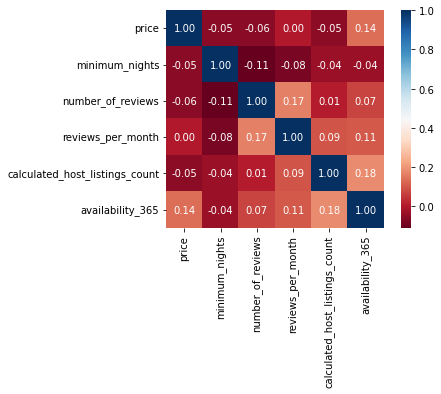

In [75]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

- Vemos uma maior correlação positiva (enquanto um cresce, o outro também) entre *calculated_host_listings_count* e *availability_365*;

- Assim como uma menor correlação negativa (enquanto um cresce, o outro diminui) entre *number_of_reviews* e *minimum_nights*.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [76]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    2790
Private room       1206
Shared room          38
Hotel room           10
Name: room_type, dtype: int64

Vemos que a casa/apartamento inteiro é o tipo que mais estão disponiveis em Chicago para locação no Airbnb.

In [77]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts()/df_clean.shape[0]*100

Entire home/apt    68.991098
Private room       29.821958
Shared room         0.939664
Hotel room          0.247280
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [78]:
# ver preços por bairros, na média
df_clean.groupby(by=['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Burnside           200.000000
Loop               177.059524
Near South Side    167.714286
Near North Side    165.959459
Lincoln Park       163.245810
Edison Park        155.000000
Lake View          152.847507
Grand Boulevard    140.794118
North Center       140.142857
West Town          139.490323
Name: price, dtype: float64

A partir da organização em groupby pelos bairros e média de preços, nos organizamos em ordem decrescente de valores das diárias. Com isso, vemos que a localidade mais cara em média é em Burnside
, em Chicago.

Agora como questionamento para quem mora em Chicago...concordaria com esta avaliação?

De acordo com este artigo ([The Most Upscale Neighborhoods in Chicago](https://www.luxurychicagoapartments.com/looking-for-luxury-heres-the-most-upscale-neighborhoods-in-chicago/)), não!

In [79]:
df_clean[df_clean.neighbourhood == 'West Town']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.901660,-87.680210,Entire home/apt,65,2,414,2021-10-06,3.340000,1,230,29,R18000034991
11,71930,"Rest, Relax and Explore",334241,Michael And Veronica,West Town,41.896150,-87.679340,Private room,60,2,80,2021-10-04,1.490000,2,341,10,R17000013986
12,84042,The Explorer Room,334241,Michael And Veronica,West Town,41.896150,-87.679340,Private room,54,2,92,2021-10-05,1.730000,2,336,13,R17000013986
33,372929,Lux Urban 3BR/3BA Duplex + Parking!,1876597,The Adventurers,West Town,41.896290,-87.657040,Entire home/apt,266,2,231,2021-10-12,3.150000,2,350,16,2510875
34,404792,Eclectic West Town 2BR w/ Vintage Charm,1844352,Christine,West Town,41.889470,-87.669330,Entire home/apt,126,5,195,2021-09-14,1.730000,1,129,6,R18000024694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6370,52224116,"Homey Entire Townhouse, 2 Bdrm West Town Charmer.",84789772,Todd,West Town,41.895428,-87.671944,Entire home/apt,149,2,1,2021-10-15,1.000000,1,336,1,R21000070688
6428,52486999,Amazing&Comfy 1 Bed 1 Bath Condo in great loca...,300061865,Yaser,West Town,41.890530,-87.672540,Private room,60,3,1,2021-10-16,1.000000,1,43,1,R21000071758
6442,52529608,Wicker Park Flat,1002360,Roland,West Town,41.907560,-87.673030,Entire home/apt,119,1,0,NaN,3.549468,1,85,0,R21000071790
6519,52788416,Home Office/Quiet Location/Walkable/Fast WiFi,427356551,Maria,West Town,41.895763,-87.662104,Entire home/apt,102,1,0,NaN,3.549468,1,325,0,R19000046119


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [80]:
# ver a média da coluna `minimum_nights``
df_clean.groupby(by=['minimum_nights'])['price'].mean().sort_values(ascending=False)[:10]

minimum_nights
13    169.500000
12    165.000000
4     144.770492
9     141.000000
3     137.597015
2     132.398780
1     113.976227
5     111.887850
6     110.593750
7     106.723214
Name: price, dtype: float64

Para o minimo de 1x noite, temos em média o valor de $114.

In [82]:
bairros = dict(df_clean['neighbourhood'].value_counts())
bairros =  pd.DataFrame(list(bairros.items()), columns=['Bairro', 'Número_de_locações'])

bar_plot3 = px.bar(bairros, x='Bairro', y='Número_de_locações', color='Bairro', text='Número_de_locações')

bar_plot3.update_layout(title_text='Os 10 bairros mais procurados em Chicago',
                        yaxis_title = 'Número de imóveis disponíveis')
                        
bar_plot3.update_traces(texttemplate='%{text:.4s}', textposition='outside')
bar_plot3.show()

## Conclusões


* Vemos que a cidade de Chicago possui valores bem altos de diária. É uma cidade famosa, movimentada, com locações de luxo e talvez por isso, eles apresentam valores altos de diárias em algumas regiões, principalmente em West Town.

* Foi feita uma análise superficial de dados do Airbnb na cidade, seria importante adquirir um dataset mais completo e atualizado com informações da cidade que permitam melhores análises.

* Com base nas informações apresentadas, é possivel um turista que nunca foi a cidade tirar algumas conclusões que o permitam escolher a melhor região possivel para se hospedar na cidade.